In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python3 /content/drive/MyDrive/R&D/load_data.py

/bin/bash: D/load_data.py: No such file or directory
python3: can't open file '/content/drive/MyDrive/R': [Errno 2] No such file or directory


In [3]:
import gzip
import itertools
import string
import wordcloud
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pylab as pl

from collections import Counter
from sklearn import svm
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

%matplotlib inline

In [4]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [7]:
# Code provided via http://jmcauley.ucsd.edu/data/amazon/

def parse_gz(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def convert_to_DF(path):
    i = 0
    df = {}
    for d in parse_gz(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [7]:
df = pd.read_csv("/content/drive/MyDrive/R&D/Amazon_multi_domain.csv")

In [ ]:
df.shape

(20000, 6)

In [8]:
#sports_outdoors = convert_to_DF('/content/drive/MyDrive/R&D/reviews_Sports_and_Outdoors_5.json.gz')
#electronics = convert_to_DF('/content/drive/MyDrive/R&D/reviews_Digital_Music_5.json.gz')
#kindle_store = convert_to_DF('/content/drive/MyDrive/R&D/reviews_Kindle_Store_5.json.gz')
#health = convert_to_DF('/content/drive/MyDrive/R&D/reviews_Health_and_Personal_Care_5.json.gz')
#video_games = convert_to_DF('/content/drive/MyDrive/R&D/reviews_Video_Games_5.json.gz')

In [8]:
num = [4.0, 5.0]
sports_outdoors_4_5 = sports_outdoors[sports_outdoors.overall.isin(num)]     #筛选出overall列值在num列表的数据条
sports_outdoors_4_5 = sports_outdoors_4_5.sample(frac = 1)
sports_outdoors_4_5 = sports_outdoors_4_5[:10000]

num = [1.0, 2.0]
sports_outdoors_1_2 = sports_outdoors[sports_outdoors.overall.isin(num)]     #筛选出overall列值在num列表的数据条
sports_outdoors_1_2 = sports_outdoors_1_2.sample(frac = 1)
sports_outdoors_1_2 = sports_outdoors_1_2[:10000]

sports_outdoors = sports_outdoors_1_2.append(sports_outdoors_4_5)


In [9]:
num = [4.0, 5.0]
health_4_5 = health[health.overall.isin(num)]     
health_4_5 = health_4_5.sample(frac = 1)
health_4_5 = health_4_5[:10000]

num = [1.0, 2.0]
health_1_2 = health[health.overall.isin(num)]    
health_1_2 = health_1_2.sample(frac = 1)
health_1_2 = health_1_2[:10000]

health = health_1_2.append(health_4_5)

In [58]:
num = [4.0, 5.0]
kindle_store_4_5 = kindle_store[kindle_store.overall.isin(num)]     
kindle_store_4_5 = kindle_store_4_5.sample(frac = 1)
kindle_store_4_5 = kindle_store_4_5[:10000]
print(len(kindle_store_4_5))
num = [1.0, 2.0]
kindle_store_1_2 = kindle_store[kindle_store.overall.isin(num)]     
kindle_store_1_2 = kindle_store_1_2.sample(frac = 1)
kindle_store_1_2 = kindle_store_1_2[:10000]
print(len(kindle_store_1_2))
kindle_store = kindle_store_1_2.append(kindle_store_4_5)

10000
10000


In [55]:
num = [4.0, 5.0]
electronics_4_5 = electronics[electronics.overall.isin(num)]     
electronics_4_5 = electronics_4_5.sample(frac = 1)
electronics_4_5 = electronics_4_5[:10000]
print(len(electronics_4_5))
num = [1.0, 2.0]
electronics_1_2 = electronics[electronics.overall.isin(num)]     
electronics_1_2 = electronics_1_2.sample(frac = 1)
electronics_1_2 = electronics_1_2[:10000]
print(len(electronics_1_2))

electronics = electronics_1_2.append(electronics_4_5)

10000
5801


In [65]:
num = [4.0, 5.0]
video_games_4_5 = video_games[video_games.overall.isin(num)]     
video_games_4_5 = video_games_4_5.sample(frac = 1)
video_games_4_5 = video_games_4_5[:10000]
print(len(video_games_4_5))
num = [1.0, 2.0]
video_games_1_2 = video_games[video_games.overall.isin(num)]     
video_games_1_2 = video_games_1_2.sample(frac = 1)
video_games_1_2 = video_games_1_2[:10000]
print(len(video_games_1_2))

video_games = video_games_1_2.append(video_games_4_5)

10000
10000


In [ ]:
df_data = pd.concat([sports_outdoors,health,kindle_store,electronics],axis=0)

In [ ]:
#df_data.shape

In [ ]:
sports_outdoors.describe()
#df_data.describe()

,overall,unixReviewTime
count,20000.000000,2.000000e+04
mean,3.139900,1.363327e+09
std,1.675132,3.579194e+07
min,1.000000,1.043885e+09
25%,2.000000,1.351469e+09
50%,3.000000,1.370909e+09
75%,5.000000,1.388880e+09
max,5.000000,1.405987e+09


In [ ]:
#sports_outdoors[:3]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
16962,A1VGWWV36PBC3W,B0007UNUN2,Cassandra Dunn,"[0, 0]","Annoying rope. Didn't do a great trick, I was ...",1.0,Couldn't get it to work,1396828800,"04 7, 2014"
140258,A29ZEV20RCXV1D,B001T9QYR4,"Anthony J. Lomenzo ""Doc Tony""","[4, 5]",I think one of the areas where it gets 'very' ...,2.0,The spring tension mount has issues!,1307232000,"06 5, 2011"
277898,A3CEJR8FKMMOTU,B009XN20G2,noah cater,"[3, 13]",Don't buy I know a while back I said it was be...,1.0,ok i take every thing back that i said,1333065600,"03 30, 2012"


In [9]:
sports_outdoors["reviewTime"] = pd.to_datetime(sports_outdoors["reviewTime"])
sports_outdoors = sports_outdoors[['asin', 'summary', 'reviewText', 'overall', 'reviewTime']]

In [14]:
#kindle_store["reviewTime"] = pd.to_datetime(kindle_store["reviewTime"])
#kindle_store = kindle_store[['asin', 'summary', 'reviewText', 'overall', 'reviewTime']]

In [113]:
electronics["reviewTime"] = pd.to_datetime(electronics["reviewTime"])
electronics = electronics[['asin', 'summary', 'reviewText', 'overall', 'reviewTime']]

In [66]:
video_games["reviewTime"] = pd.to_datetime(video_games["reviewTime"])
video_games = video_games[['asin', 'summary', 'reviewText', 'overall', 'reviewTime']]

In [10]:
health["reviewTime"] = pd.to_datetime(health["reviewTime"])
health = health[['asin', 'summary', 'reviewText', 'overall', 'reviewTime']]

In [ ]:
df_data["reviewTime"] = pd.to_datetime(df_data["reviewTime"])


In [ ]:
df_data = df_data[['asin', 'summary', 'reviewText', 'overall', 'reviewTime']]

In [16]:
health.shape

(20000, 5)

Saving as a csv file

In [67]:
df_video_games = pd.DataFrame(video_games)
df_video_games.to_csv('video_games.csv')
#df = pd.DataFrame(df_data)
#df.to_csv('Amazon_multi_domain.csv')
#df = pd.read_csv('Amazon_multi_domain.csv')
#df_sports_outdoors=pd.read_csv('sports_outdoors.csv')

In [64]:
df_kindle_store = pd.DataFrame(kindle_store)
df_kindle_store.to_csv('kindle_store.csv')

In [11]:
df_health = pd.DataFrame(health)
df_health.to_csv('health.csv')

In [12]:
from google.colab import files
#files.download('sports_outdoors.csv')
#files.download('Amazon_multi_domain.csv')
files.download('health.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Shuffling the entire dataset

In [8]:
#df = df_sports_outdoors.sample(frac = 1)
#df = df_video_games.sample(frac = 1)
df = df.sample(frac = 1)

In [12]:
# visualising the dataset after shuffling
df.head()

,Unnamed: 0,asin,summary,reviewText,overall,reviewTime
15015,51793,B000EGDNCW,Compression at absurd levels.,It really isn't about the music. The review is...,2.0,2013-03-16
5586,236045,B004RQWYDO,What you pay for.,I purchased this monitor in hopes of better im...,2.0,2013-09-10
19707,15234,B000002KH3,Anything less than 5 stars should be actionable,YOU should be tossed in jail if you give this ...,5.0,2006-05-06
7017,310959,B00BHVZKOW,Why is this called compact?,The measurements are not listed here at the ti...,2.0,2013-11-05
16434,42238,B00009LI14,"Get a shredder for this ""hotel paper""",What happened to Michelle Branch? Her debut TH...,1.0,2003-07-07


###Statistical analysis

In [11]:
df.describe()

,Unnamed: 0,overall
count,20000.000000,20000.000000
mean,202483.982250,3.127100
std,219580.098119,1.668618
min,25.000000,1.000000
25%,45264.250000,2.000000
50%,132873.000000,3.000000
75%,267561.000000,5.000000
max,982410.000000,5.000000


In [73]:
# check no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 184281 to 184741
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   asin        20000 non-null  object        
 1   summary     20000 non-null  object        
 2   reviewText  20000 non-null  object        
 3   overall     20000 non-null  float64       
 4   reviewTime  20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 937.5+ KB


In [14]:
df.shape

(20000, 6)

In [75]:
# Total number of instances having positive review and negative review
df['overall'].value_counts()

5.0    6870
1.0    5282
2.0    4718
4.0    3130
Name: overall, dtype: int64

# Data pre-processing

In [15]:
df['overall'] = np.where((df['overall']<3), 0, df.overall)  # change rating < 3 to value 0 (negative)
df['overall'] = np.where((df['overall']>3), 1, df.overall)  # change rating > 3 to value 1 (positive)

In [17]:
df.head()

,Unnamed: 0,asin,summary,reviewText,overall,reviewTime
15015,51793,B000EGDNCW,Compression at absurd levels.,It really isn't about the music. The review is...,0.0,2013-03-16
5586,236045,B004RQWYDO,What you pay for.,I purchased this monitor in hopes of better im...,0.0,2013-09-10
19707,15234,B000002KH3,Anything less than 5 stars should be actionable,YOU should be tossed in jail if you give this ...,1.0,2006-05-06
7017,310959,B00BHVZKOW,Why is this called compact?,The measurements are not listed here at the ti...,0.0,2013-11-05
16434,42238,B00009LI14,"Get a shredder for this ""hotel paper""",What happened to Michelle Branch? Her debut TH...,0.0,2003-07-07


In [20]:
# Check for the null value for the dataset
print(df.isna().sum())

Unnamed: 0    0
asin          0
summary       0
reviewText    5
overall       0
reviewTime    0
dtype: int64


In [21]:
# splitting the data into train & test set

from sklearn.model_selection import train_test_split
train,test=train_test_split(df, test_size=0.3)

In [22]:
print(train.shape)
print(test.shape)

(14000, 6)
(6000, 6)


###Data cleaning

Importing the NLTK tools

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import gensim
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
#General Imports
import numpy as np
import pandas as pd
import pickle 
from os.path import join

#Preprocessing related imports 
import nltk
# nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import gensim.parsing.preprocessing as gpp
import gensim.utils as gu

In [26]:
def preprocess_text(text):
    preprocs = [
        gpp.strip_tags, 
        gpp.strip_punctuation,
        gpp.strip_multiple_whitespaces,
        gpp.strip_numeric,
        gpp.remove_stopwords, 
        gpp.strip_short, 
    ]
    text = gu.to_unicode(text.lower().strip())
    # https://stackoverflow.com/a/49146722/330558
    def remove_emoji(text):  
      emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
      return emoji_pattern.sub(r'', string)
    for preproc in preprocs:
        text = preproc(text)
    return text

def lemmatize(text):
    """Lemmatizes a given string text input"""
    wnl = WordNetLemmatizer()
    return wnl.lemmatize(text)  

In [27]:
def preprocess_text(text):
    """Preprocesses a given string text input"""
    preprocs = [
        gpp.strip_tags, 
        gpp.strip_punctuation,
        gpp.strip_multiple_whitespaces,
        gpp.strip_numeric,
        gpp.remove_stopwords, 
        gpp.strip_short, 
    ]
    text = gu.to_unicode(text.lower().strip())
    for preproc in preprocs:
        text = preproc(text)
    return text

def lemmatize(text):
    """Lemmatizes a given string text input"""
    wnl = WordNetLemmatizer()
    return wnl.lemmatize(text)  

In [28]:
# Combining both the above functions into a single preprocessing function
preprocess = lambda text: lemmatize(preprocess_text(str(text)))

In [29]:
type(preprocess)


function

In [31]:
train.head()

,Unnamed: 0,asin,summary,reviewText,overall,reviewTime
238,267114,B0087GH9C6,Junk,Don't waste your money this product is very ch...,0.0,2014-04-17
7630,205909,B003RP6OUU,Great kit,"I had a smaller size, but needed this size for...",1.0,2013-12-31
14990,713452,B00GIN8YDI,A very honest and touching book.,This starts out as a book about teenage pregna...,1.0,2014-04-15
14334,140486,B006E1A7W0,The Burn List,Abby and Lucas' story will make you burn. Is...,1.0,2013-01-02
15369,42768,B0000AGWEC,More Like the Male Version Of Annie,Let me be frank and honest with you people. Wh...,0.0,2003-10-24


#Define the model

In [32]:
y_train = train['overall']
X_train = train
X_train.drop('overall', axis = 1, inplace = True)

y_test = test['overall']
X_test = test
X_test.drop('overall', axis = 1, inplace = True)

##Tokenization

In [ ]:
#!python3 -m pip install --upgrade tensorflow

In [33]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 10000)  # maximum of word frequency
tokenizer.fit_on_texts(X_train['reviewText'].astype("str"))  # A class of Keras to update the internal vocabulary for the text list

In [34]:
X_train['reviewText']

238      Don't waste your money this product is very ch...
7630     I had a smaller size, but needed this size for...
14990    This starts out as a book about teenage pregna...
14334    Abby and Lucas' story will  make you burn.  Is...
15369    Let me be frank and honest with you people. Wh...
                               ...                        
4160     I hate callouses.  They are ugly and, when the...
1614     I was very disappointed with the these shorts....
8555     This product did wonders for a sluggish right ...
8150     5/5 would lube again.  Works fine not too slim...
11453    I couldn't get into this book. I found myself ...
Name: reviewText, Length: 14000, dtype: object

In [35]:
X_train['text_tok'] = tokenizer.texts_to_sequences(X_train['reviewText'].values.astype("str"))
X_test['text_tok'] = tokenizer.texts_to_sequences(X_test['reviewText'].values.astype("str"))

In [ ]:
X_train.head()

,Unnamed: 0,asin,summary,reviewText,reviewTime,text_tok
14475,785594,B00HS3XJD2,Got to have more,WHAT!!!!! it was getting to the good parts. Ma...,2014-05-20,"[55, 7, 16, 249, 5, 1, 37, 736, 250, 9, 49, 8,..."
9113,1330,B000050FDY,Great pricing for a expensive item in stores!!,I've our jaded replacement cartridges before a...,2014-01-12,"[141, 337, 8313, 997, 3902, 157, 2, 30, 88, 60..."
12096,478723,B00C3JDUJ4,too much and not enough,There was entirely too much about staying virg...,2014-05-27,"[56, 16, 1980, 85, 73, 51, 2530, 46, 138, 11, ..."
8441,17714,B00020I91A,Seems to help,After reading a previous post about using for ...,2012-04-10,"[82, 224, 3, 715, 957, 51, 195, 12, 202, 4, 50..."
2797,134194,B001OLVI5A,good piece for the price,THE METAL WAS GOOD QUALITY AND LOOKS GREAT ON ...,2012-04-17,"[1, 482, 16, 37, 208, 2, 485, 62, 13, 1, 221, ..."


##Padding and truncating

In [36]:
from tensorflow.keras.preprocessing import sequence
max_review_length = 1500      # the maximum length of the input text
X_train_pad = sequence.pad_sequences(X_train['text_tok'].values, maxlen=max_review_length,  padding='post')
X_test_pad = sequence.pad_sequences(X_test['text_tok'].values, maxlen=max_review_length,  padding='post')

In [37]:
X_train_pad
#X_train_pad.shape

array([[ 69, 408,  61, ...,   0,   0,   0],
       [  4,  57,   3, ...,   0,   0,   0],
       [  9, 776,  36, ...,   0,   0,   0],
       ...,
       [  9,  99, 101, ...,   0,   0,   0],
       [140, 140,  49, ...,   0,   0,   0],
       [  4, 367,  52, ...,   0,   0,   0]], dtype=int32)

## Using Glove Vector

In [38]:
embedding_dim = 300
def create_embedding_matrix(filepath, word_index, embedding):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath, encoding="utf-8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [39]:
embedding_matrix = create_embedding_matrix(r"/content/drive/MyDrive/R&D/glove.6B.300d.txt", tokenizer.word_index, embedding_dim)

In [ ]:
embedding_matrix[:5]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04656   ,  0.21318001, -0.0074364 , ...,  0.0090611 ,
        -0.20988999,  0.053913  ],
       [-0.13292   ,  0.16985001, -0.1436    , ..., -0.23778   ,
         0.14766   ,  0.62901998],
       [-0.29712   ,  0.094049  , -0.096662  , ...,  0.059717  ,
        -0.22853   ,  0.29602   ],
       [ 0.038466  , -0.039792  ,  0.082747  , ..., -0.33427   ,
         0.011807  ,  0.059703  ]])

In [ ]:
embedding_matrix.shape

(29193, 300)

In [40]:
from numpy import zeros
max_vocabulary = len(tokenizer.word_index)

In [41]:
from tensorflow.python.keras.utils import np_utils
X_train = X_train_pad
X_test = X_test_pad
Y_train = y_train
Y_test = y_test

In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import load_model
from sklearn import metrics
import seaborn as sns
from keras import Sequential
from keras.layers import Bidirectional, LSTM, Embedding, Dropout, Dense,Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.layers.convolutional import Convolution1D
from keras.layers.pooling import MaxPool1D

In [43]:
# Bi-lstm
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, concatenate, LSTM, Conv1D, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model, load_model
#from tensorflow.keras.models import Sequential, Model
#import tensorflow as tf
#tf.compat.v1.disable_v2_behavior()


review = Input(shape=(1500,), name='reviewText')

X = Embedding(output_dim=300, input_dim=max_vocabulary+1, input_length=1500,weights=[embedding_matrix],trainable=False)(review)
lstm_review = Bidirectional(LSTM(100))(X)

x = Dropout(0.5)(lstm_review)

x = Flatten()(x)

x = Dense(64,activation="relu",kernel_initializer="he_normal", kernel_regularizer=l2(0.001))(x)

x = Dense(8,activation="relu",kernel_initializer="he_normal", kernel_regularizer=l2(0.001))(x)
                                    
#output = Dense(8, activation='sigmoid', name='output')(x)
output = Dense(2, activation='sigmoid', name='output')(x)

model = Model(inputs=[review],outputs=[output])

model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reviewText (InputLayer)     [(None, 1500)]            0         
                                                                 
 embedding (Embedding)       (None, 1500, 300)         14451000  
                                                                 
 bidirectional (Bidirectiona  (None, 200)              320800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                             

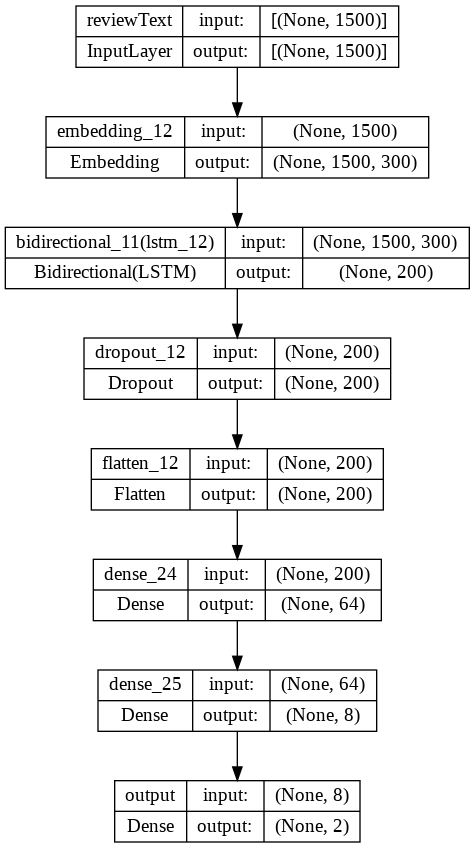

In [108]:
# plotting the Model
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['acc'])
epochs=10
history=model.fit(X_train, np_utils.to_categorical(Y_train), 
                  validation_data=(X_test, np_utils.to_categorical(Y_test)), 
                  epochs=epochs, batch_size=16)

Epoch 1/10
875/875 [==============================] - 127s 137ms/step - loss: 0.6367 - acc: 0.6859 - val_loss: 0.4832 - val_acc: 0.7913
Epoch 2/10
875/875 [==============================] - 120s 137ms/step - loss: 0.4835 - acc: 0.7914 - val_loss: 0.4217 - val_acc: 0.8207
Epoch 3/10
875/875 [==============================] - 121s 138ms/step - loss: 0.4131 - acc: 0.8254 - val_loss: 0.3880 - val_acc: 0.8368
Epoch 4/10
875/875 [==============================] - 119s 136ms/step - loss: 0.3515 - acc: 0.8579 - val_loss: 0.3679 - val_acc: 0.8423
Epoch 5/10
875/875 [==============================] - 118s 135ms/step - loss: 0.3120 - acc: 0.8744 - val_loss: 0.3443 - val_acc: 0.8570
Epoch 6/10
875/875 [==============================] - 119s 136ms/step - loss: 0.3061 - acc: 0.8800 - val_loss: 0.3698 - val_acc: 0.8478
Epoch 7/10
875/875 [==============================] - 125s 143ms/step - loss: 0.2737 - acc: 0.8927 - val_loss: 0.3873 - val_acc: 0.8365
Epoch 8/10
875/875 [============================

438/438 [==============================] - 22s 48ms/step - loss: 0.1421 - acc: 0.9583
train_acc= 0.9583
188/188 [==============================] - 9s 48ms/step - loss: 0.3722 - acc: 0.8482
val_acc= 0.8482


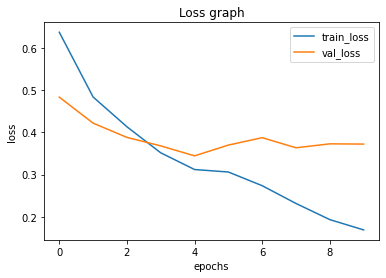

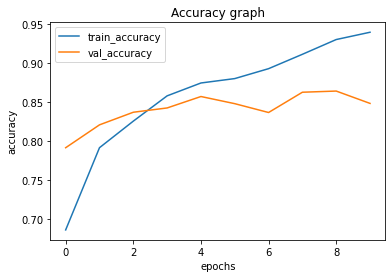

In [45]:
loss,accuracy=model.evaluate(X_train,np_utils.to_categorical(Y_train))
print("train_acc= {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, np_utils.to_categorical(Y_test))
print("val_acc= {:.4f}".format(accuracy))

#record
history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["acc"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_acc"]

#loss
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.title('Loss graph')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

#accuracy
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.title("Accuracy graph")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Model prediction...........
188/188 [==============================] - 12s 60ms/step
[[2385  611]
 [ 300 2704]]
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      2996
         1.0       0.82      0.90      0.86      3004

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



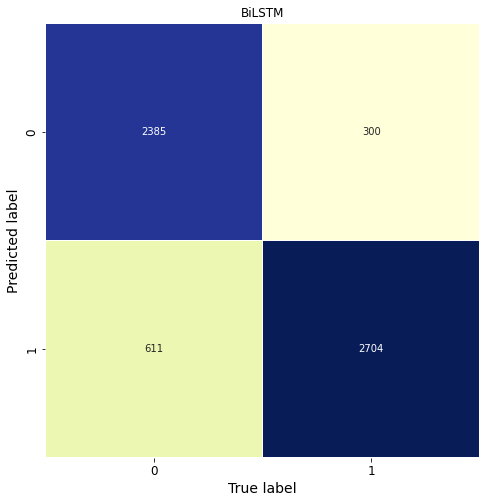

188/188 [==============================] - 9s 47ms/step - loss: 0.3722 - acc: 0.8482
test_acc= 0.8482


In [46]:
# kindle_store
print("Model prediction...........")
test_pre = model.predict(X_test)
# Evaluate the prediction effect and calculate the confusion matrix
confm = metrics.confusion_matrix(Y_test, np.argmax(test_pre, axis=1))
print(confm)
# Confusion matrix plot
Labname = ["0", "1"]
print(metrics.classification_report(Y_test, np.argmax(test_pre, axis=1)))
plt.figure(figsize=(8, 8))
sns.heatmap(confm.T, square=True, annot=True,
            fmt='d', cbar=False, linewidths=.6,
            cmap="YlGnBu")
plt.xlabel('True label', size=14)
plt.ylabel('Predicted label', size=14)
plt.xticks(np.arange(2) + 0.5, Labname, size=12)
plt.yticks(np.arange(2) + 0.5, Labname, size=12)
plt.title('BiLSTM')
# plt.savefig('result_lstm_word2vec.png')
plt.show()
loss, accuracy = model.evaluate(X_test, np_utils.to_categorical(Y_test))
print("test_acc= {:.4f}".format(accuracy))

Model prediction...........
188/188 [==============================] - 12s 58ms/step
[[2645  416]
 [ 371 2568]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      3061
         1.0       0.86      0.87      0.87      2939

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



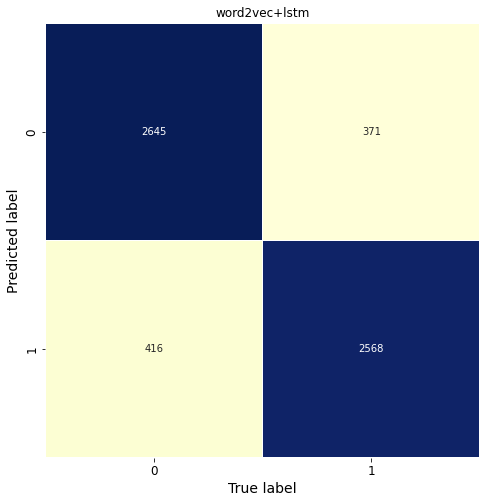

188/188 [==============================] - 12s 61ms/step - loss: 0.4326 - acc: 0.8688
test_acc= 0.8688


In [ ]:
# sport_outdoor
print("Model prediction...........")
test_pre = model.predict(X_test)
# Evaluate the prediction effect and calculate the confusion matrix
confm = metrics.confusion_matrix(Y_test, np.argmax(test_pre, axis=1))
print(confm)
# Confusion matrix plot
Labname = ["0", "1"]
print(metrics.classification_report(Y_test, np.argmax(test_pre, axis=1)))
plt.figure(figsize=(8, 8))
sns.heatmap(confm.T, square=True, annot=True,
            fmt='d', cbar=False, linewidths=.6,
            cmap="YlGnBu")
plt.xlabel('True label', size=14)
plt.ylabel('Predicted label', size=14)
plt.xticks(np.arange(2) + 0.5, Labname, size=12)
plt.yticks(np.arange(2) + 0.5, Labname, size=12)
plt.title('word2vec+lstm')
# plt.savefig('result_lstm_word2vec.png')
plt.show()
loss, accuracy = model.evaluate(X_test, np_utils.to_categorical(Y_test))
print("test_acc= {:.4f}".format(accuracy))

Bi-LSTM-CNN

In [47]:
epochs_num = 10
num_label = 2
max_len = 1500
embedding_dim = 300

lstm_size=64
conkernel_num=32
conkernel_size=5
pool_size_num=3
dropout_rate=0.3
kernel_num=64

In [48]:
def created_model(lstm_size, vocab_size, embedding_dim, max_len,conkernel_num, conkernel_size,pool_size_num ,dropout_rate,kernel_num,num_label):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                        weights=[embedding_matrix], input_length=max_len,
                        trainable=True))
    model.add(Bidirectional(LSTM(lstm_size, return_sequences=True)))
    model.add(Convolution1D(conkernel_num, conkernel_size, padding='same', strides=1, activation='relu'))
    model.add(MaxPool1D(pool_size=pool_size_num))
    model.add(Flatten())
    model.add(Dense(kernel_num, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_label, activation='softmax'))
    model.summary()
    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [49]:
param_grid = dict(lstm_size=[64],
                  vocab_size=[len(tokenizer.index_word) + 1],
                  embedding_dim=[embedding_dim],
                  max_len=[max_len],
                  conkernel_num=[32],
                  conkernel_size=[3,5],
                  pool_size_num=[3],
                  dropout_rate=[0.3],
                  kernel_num=[64],
                  num_label=[2],
                  )

param_outputflie = './param_out.txt'

In [50]:
# All
model = KerasClassifier(build_fn=created_model, epochs=epochs_num, batch_size=16, verbose=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=4, verbose=1, n_iter=1)  # n_iter=5
grid_result = grid.fit(X_train_pad, y_train)
#
test_accuracy = grid.score(X_test_pad, y_test)

with open(param_outputflie, 'a') as f:
    s = ('best Accuracy:'
         '{:.4f}\n{}\n test accuracy: {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy
    )
    print(output_string)
    f.write(output_string)


<ipython-input-50-8c8f1cba2665>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=created_model, epochs=epochs_num, batch_size=16, verbose=True)


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1500, 300)         14451000  
                                                                 
 bidirectional_1 (Bidirectio  (None, 1500, 128)        186880    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 1500, 32)          12320     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 32)          0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                               

In [106]:
# video_game
model = KerasClassifier(build_fn=created_model, epochs=epochs_num, batch_size=16, verbose=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=4, verbose=1, n_iter=1)  # n_iter=5
grid_result = grid.fit(X_train_pad, y_train)
#
test_accuracy = grid.score(X_test_pad, y_test)

with open(param_outputflie, 'a') as f:
    s = ('best Accuracy:'
         '{:.4f}\n{}\n test accuracy: {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy
    )
    print(output_string)
    f.write(output_string)


<ipython-input-106-f4aeb2dc1bbd>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=created_model, epochs=epochs_num, batch_size=16, verbose=True)


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1500, 300)         15006900  
                                                                 
 bidirectional_7 (Bidirectio  (None, 1500, 128)        186880    
 nal)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 1500, 32)          20512     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 500, 32)          0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 16000)             0         
                                                             

In [100]:
# kindle
model = KerasClassifier(build_fn=created_model, epochs=epochs_num, batch_size=16, verbose=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=4, verbose=1, n_iter=1)  # n_iter=5
grid_result = grid.fit(X_train_pad, y_train)
#
test_accuracy = grid.score(X_test_pad, y_test)

with open(param_outputflie, 'a') as f:
    s = ('best Accuracy:'
         '{:.4f}\n{}\n test accuracy: {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy
    )
    print(output_string)
    f.write(output_string)


<ipython-input-100-906c44baa52f>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=created_model, epochs=epochs_num, batch_size=16, verbose=True)


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1500, 300)         11057100  
                                                                 
 bidirectional_5 (Bidirectio  (None, 1500, 128)        186880    
 nal)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 1500, 32)          12320     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 500, 32)          0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 16000)             0         
                                                             

In [61]:
# health
model = KerasClassifier(build_fn=created_model, epochs=epochs_num, batch_size=16, verbose=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=4, verbose=1, n_iter=1)  # n_iter=5
grid_result = grid.fit(X_train_pad, y_train)
#
test_accuracy = grid.score(X_test_pad, y_test)

with open(param_outputflie, 'a') as f:
    s = ('best Accuracy:'
         '{:.4f}\n{}\n test accuracy: {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy
    )
    print(output_string)
    f.write(output_string)


<ipython-input-61-b0c076adee86>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=created_model, epochs=epochs_num, batch_size=16, verbose=True)


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1500, 300)         9051600   
                                                                 
 bidirectional_2 (Bidirectio  (None, 1500, 128)        186880    
 nal)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 1500, 32)          12320     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 500, 32)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16000)             0         
                                                             

In [52]:
vocab_size = max_vocabulary+1
model1=created_model(lstm_size, vocab_size, embedding_dim, max_len,conkernel_num, conkernel_size,pool_size_num ,dropout_rate,kernel_num,num_label)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1500, 300)         14451000  
                                                                 
 bidirectional_6 (Bidirectio  (None, 1500, 128)        186880    
 nal)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 1500, 32)          20512     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 500, 32)          0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 16000)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [58]:
model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['acc'])
#epochs=10
history=model1.fit(X_train, np_utils.to_categorical(Y_train), 
                  validation_data=(X_test, np_utils.to_categorical(Y_test)), 
                  epochs=epochs, batch_size=256)

Epoch 1/10
55/55 [==============================] - 25s 386ms/step - loss: 0.5745 - acc: 0.6932 - val_loss: 0.4492 - val_acc: 0.7968
Epoch 2/10
55/55 [==============================] - 21s 376ms/step - loss: 0.3686 - acc: 0.8410 - val_loss: 0.3707 - val_acc: 0.8307
Epoch 3/10
55/55 [==============================] - 21s 376ms/step - loss: 0.2609 - acc: 0.8903 - val_loss: 0.3722 - val_acc: 0.8475
Epoch 4/10
55/55 [==============================] - 21s 385ms/step - loss: 0.1980 - acc: 0.9242 - val_loss: 0.3619 - val_acc: 0.8480
Epoch 5/10
55/55 [==============================] - 20s 370ms/step - loss: 0.1422 - acc: 0.9476 - val_loss: 0.4442 - val_acc: 0.8435
Epoch 6/10
55/55 [==============================] - 20s 369ms/step - loss: 0.0996 - acc: 0.9656 - val_loss: 0.5404 - val_acc: 0.8435
Epoch 7/10
55/55 [==============================] - 20s 371ms/step - loss: 0.0703 - acc: 0.9758 - val_loss: 0.7401 - val_acc: 0.8370
Epoch 8/10
55/55 [==============================] - 20s 370ms/step - 

In [109]:
model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['acc'])
#epochs=10
history=model1.fit(X_train, np_utils.to_categorical(Y_train), 
                  validation_data=(X_test, np_utils.to_categorical(Y_test)), 
                  epochs=epochs, batch_size=256)

Epoch 1/10
55/55 [==============================] - 25s 394ms/step - loss: 1.0281 - acc: 0.5388 - val_loss: 0.6868 - val_acc: 0.5492
Epoch 2/10
55/55 [==============================] - 21s 383ms/step - loss: 0.6774 - acc: 0.5753 - val_loss: 0.6644 - val_acc: 0.6032
Epoch 3/10
55/55 [==============================] - 21s 374ms/step - loss: 0.6399 - acc: 0.6386 - val_loss: 0.6038 - val_acc: 0.6752
Epoch 4/10
55/55 [==============================] - 20s 373ms/step - loss: 0.4994 - acc: 0.7581 - val_loss: 0.4710 - val_acc: 0.7795
Epoch 5/10
55/55 [==============================] - 20s 372ms/step - loss: 0.3305 - acc: 0.8607 - val_loss: 0.3649 - val_acc: 0.8403
Epoch 6/10
55/55 [==============================] - 21s 374ms/step - loss: 0.2301 - acc: 0.9127 - val_loss: 0.3823 - val_acc: 0.8448
Epoch 7/10
55/55 [==============================] - 20s 373ms/step - loss: 0.1689 - acc: 0.9349 - val_loss: 0.3997 - val_acc: 0.8523
Epoch 8/10
55/55 [==============================] - 20s 372ms/step - 

In [53]:
# All
model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['acc'])
#epochs=10
history=model1.fit(X_train, np_utils.to_categorical(Y_train), 
                  validation_data=(X_test, np_utils.to_categorical(Y_test)), 
                  epochs=epochs, batch_size=256)

Epoch 1/10
55/55 [==============================] - 24s 377ms/step - loss: 0.5677 - acc: 0.6975 - val_loss: 0.4185 - val_acc: 0.8088
Epoch 2/10
55/55 [==============================] - 20s 360ms/step - loss: 0.3532 - acc: 0.8488 - val_loss: 0.3306 - val_acc: 0.8610
Epoch 3/10
55/55 [==============================] - 20s 362ms/step - loss: 0.2470 - acc: 0.9021 - val_loss: 0.3229 - val_acc: 0.8652
Epoch 4/10
55/55 [==============================] - 21s 374ms/step - loss: 0.1789 - acc: 0.9329 - val_loss: 0.3668 - val_acc: 0.8600
Epoch 5/10
55/55 [==============================] - 21s 386ms/step - loss: 0.1309 - acc: 0.9521 - val_loss: 0.3856 - val_acc: 0.8753
Epoch 6/10
55/55 [==============================] - 20s 367ms/step - loss: 0.0883 - acc: 0.9684 - val_loss: 0.5228 - val_acc: 0.8552
Epoch 7/10
55/55 [==============================] - 21s 374ms/step - loss: 0.0509 - acc: 0.9829 - val_loss: 0.6415 - val_acc: 0.8645
Epoch 8/10
55/55 [==============================] - 20s 374ms/step - 

438/438 [==============================] - 20s 45ms/step - loss: 0.0069 - acc: 0.9985
train_acc= 0.9985
188/188 [==============================] - 9s 45ms/step - loss: 0.8231 - acc: 0.8593
val_acc= 0.8593


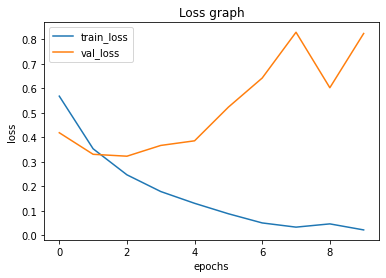

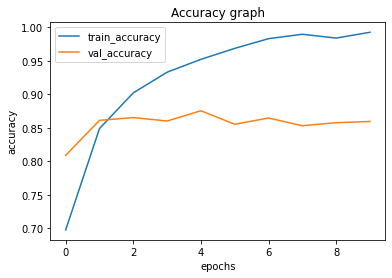

In [54]:
loss,accuracy=model1.evaluate(X_train,np_utils.to_categorical(Y_train))
print("train_acc= {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, np_utils.to_categorical(Y_test))
print("val_acc= {:.4f}".format(accuracy))

#record
history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["acc"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_acc"]

#loss
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.title('Loss graph')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

#accuracy
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.title("Accuracy graph")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

438/438 [==============================] - 23s 54ms/step - loss: 0.0315 - acc: 0.9921
train_acc= 0.9921
188/188 [==============================] - 10s 53ms/step - loss: 0.6704 - acc: 0.8370
val_acc= 0.8370


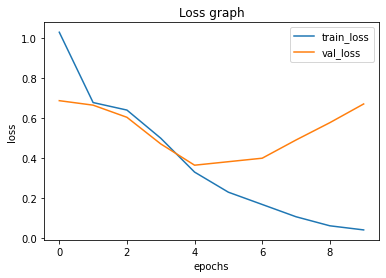

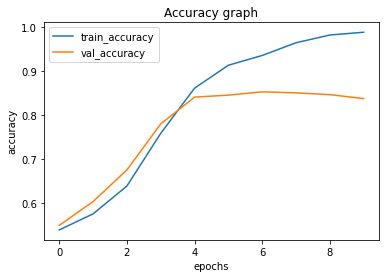

In [110]:
# video_game画图后
loss,accuracy=model1.evaluate(X_train,np_utils.to_categorical(Y_train))
print("train_acc= {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, np_utils.to_categorical(Y_test))
print("val_acc= {:.4f}".format(accuracy))

#record
history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["acc"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_acc"]

#loss
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.title('Loss graph')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

#accuracy
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.title("Accuracy graph")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

438/438 [==============================] - 23s 53ms/step - loss: 3.4159e-04 - acc: 0.9998
train_acc= 0.9998
188/188 [==============================] - 10s 54ms/step - loss: 2.0384 - acc: 0.8452
val_acc= 0.8452


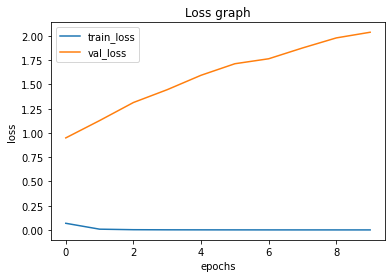

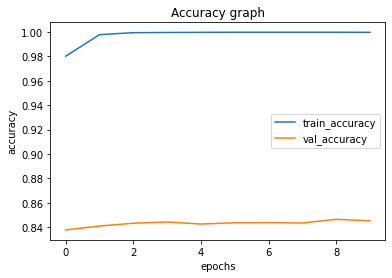

In [63]:
#health 
loss,accuracy=model1.evaluate(X_train,np_utils.to_categorical(Y_train))
print("train_acc= {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, np_utils.to_categorical(Y_test))
print("val_acc= {:.4f}".format(accuracy))

#record
history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["acc"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_acc"]

#loss
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.title('Loss graph')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

#accuracy
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.title("Accuracy graph")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Model prediction...........
188/188 [==============================] - 9s 44ms/step
[[2603  393]
 [ 451 2553]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2996
         1.0       0.87      0.85      0.86      3004

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



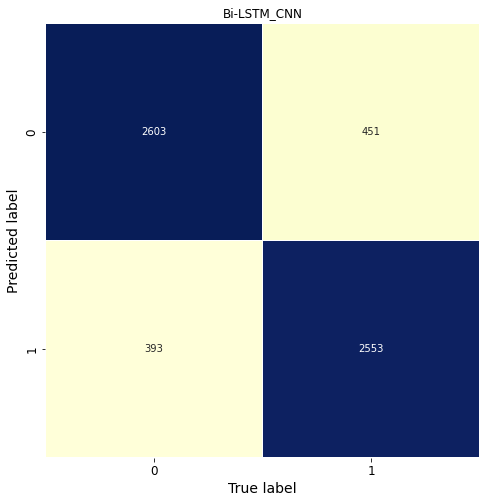

188/188 [==============================] - 9s 46ms/step - loss: 0.8231 - acc: 0.8593
test_acc= 0.8593


In [55]:
print("Model prediction...........")
test_pre = model1.predict(X_test)
# Evaluate the prediction effect and calculate the confusion matrix
confm = metrics.confusion_matrix(Y_test, np.argmax(test_pre, axis=1))
print(confm)
# Confusion matrix plot
Labname = ["0", "1"]
print(metrics.classification_report(Y_test, np.argmax(test_pre, axis=1)))
plt.figure(figsize=(8, 8))
sns.heatmap(confm.T, square=True, annot=True,
            fmt='d', cbar=False, linewidths=.6,
            cmap="YlGnBu")
plt.xlabel('True label', size=14)
plt.ylabel('Predicted label', size=14)
plt.xticks(np.arange(2) + 0.5, Labname, size=12)
plt.yticks(np.arange(2) + 0.5, Labname, size=12)
plt.title('Bi-LSTM_CNN')
# plt.savefig('result_lstm_word2vec.png')
plt.show()
loss, accuracy = model1.evaluate(X_test, np_utils.to_categorical(Y_test))
print("test_acc= {:.4f}".format(accuracy))